# Calculus I - Sympy Preparation Januari 2024

## Naam: Duwel

## Voornaam: Simeon

## Studentennummer: r0978210

### Algemene instructies
1. Zorg ervoor dat je worksheet geen foutmeldingen geeft wanneer je deze herstart en volledig laat uitvoeren. Je kan dit nakijken door bovenaan op "Kernel" te klikken, en vervolgens "Restart & Run All".
2. Deze worksheet mag **op papier** naar het examen meegenomen worden.

**&copy; 2024 Didactisch Team Calculus I. Het kopiëren, reproduceren, aanpassen, vertalen, bewerken en/of wijzigen van één of meerdere examenvragen in dit document is verboden zonder voorafgaande toestemming van de auteur(s).**

---

### Imports en nuttige symbolen

Voer onderstaand blok code uit om de nodige pakketten te importeren.


In [2]:
import sympy as sp 
import numpy as np 
import matplotlib.pyplot as plt 

#### Deze preparation sheet bestaat uit twee vragen met bijhorende deelvragen:

Vraag 1: 4 deelvragen

Vraag 2: 3 deelvragen

## Vraag 1

Gegeven volgende differentiaalvergelijking:

$$ \dfrac{\mathrm{d}y}{\mathrm{d}x} = e^{ax}\sin bx$$

met $a, b \in \mathbb{R}$. Los de volgende vragen op.

#### Deelvraag a
Definieer deze differentiaalvergelijking in `sympy` en geef de vergelijking weer.

In [3]:
a, b, x = sp.symbols("a b x")
f = sp.Function('f')

difvgl = sp.Eq(sp.diff(f(x), x), sp.exp(a * x) * sp.sin(b * x))
difvgl

Eq(Derivative(f(x), x), exp(a*x)*sin(b*x))

#### Deelvraag b
Los deze differentiaalvergelijk op met `sympy` en geef de oplossing weer. Gebruik de beginvoorwaarde $y(0) = a.$

In [11]:
opl = sp.dsolve(difvgl, f(x), ics = {f(0): a})
opl

Eq(f(x), a*exp(a*x)*sin(b*x)/(a**2 + b**2) - b*exp(a*x)*cos(b*x)/(a**2 + b**2) + (a**3 + a*b**2 + b)/(a**2 + b**2))

#### Deelvraag c
Bepaal de $x$-waarden van twee extrema punten van de functie $y(x)$ die aan de differentiaalvergelijking voldoet met behulp van `sympy` en geef de uitdrukking weer.

In [25]:
afgeleide = sp.diff(opl.rhs, x)
extrema = sp.solve(sp.Eq(afgeleide, 0), x)

extrema

[0, pi/b]

#### Deelvraag d
Maak een plot met behulp van `matplotlib` en teken in één venster

<ol>
    <li> een lijnplot voor twee oplossingskrommen horende bij parameterwaarden $(a, b) = (0.5, 2)$ en  $(a, b) = (0.5, 4)$</li>
    <li> een scatterplot dat de twee extremapunten (uit deelvraag c) van iedere oplossingskrommen aanduidt </li>
</ol>

Zorg ervoor dat het venster beperkt is tot $x \in [0, 10]$ en $y\in[-60, 30]$. Benoem de assen met de juiste labels "$x$" en "$y$". Maak ook een legende waarbij je de krommen benoemt op basis van hun corresponderende $b$-waarden. Gebruik de volgende functionaliteiten om de code overzichtelijk te houden:

<ul>
    <li> lambdify om de analytische uitdrukkingen van sympy numerisch te benaderen</li>
    <li> subs om de constanten $a$ en $b$ te substitueren in de oplossing</li>
    <li> twee for-loops om over de constante $b$ en de extremapunten te itereren.</li>
</ol>

**Opmerking**: Werk verder met de analytische uitdrukkingen die je in de voorgaande deelvragen hebt afgeleidt.

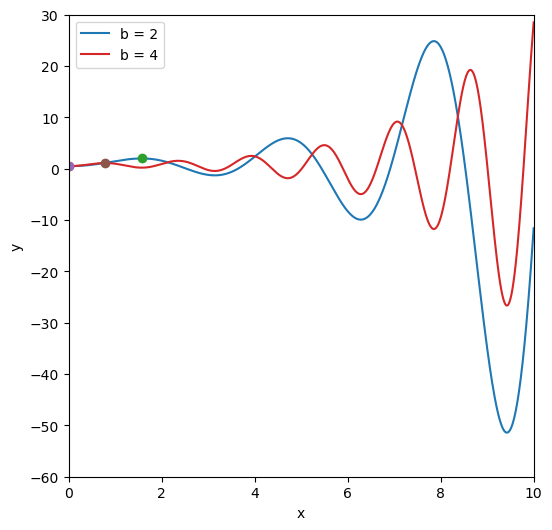

In [34]:
fig    = plt.figure(figsize=(6, 6))
ax     = fig.add_subplot()

xx     = np.linspace(-0., 10., 1000)
# ------- Vul verder aan ------- 


ax.set_xlim([0, 10])
ax.set_ylim([-60, 30])
ax.set_xlabel("x")
ax.set_ylabel("y")

for b_waarde in [2, 4]:
    kromme =  opl.rhs.subs(a, 0.5).subs(b, b_waarde)
    y_waarden = sp.lambdify(x, kromme, "numpy")(xx)
    ax.plot(xx, y_waarden, label = f"b = {b_waarde}")

    for extremum in extrema:
        x_waarde = extremum.subs(b, b_waarde)
        y_waarde = kromme.subs(x, x_waarde)
        ax.plot(x_waarde, y_waarde, 'o')

ax.legend()

plt.show()

## Vraag 2

Gegeven de volgende integraal 

$$ I = \int_0^\pi \sin x \, \mathrm{d}x$$

We benaderen deze integraal als een (eindige) Riemann som:

$$ I \approx I_N = \sum_{i=0}^N \sin x_i \, \Delta x$$

met $N \in \mathbb{N}_0$, $x_i = i\pi/N$ en $\Delta x = \pi/N$. Los de volgende vragen op.

#### Deelvraag a
Definieer een Pythonfunctie die als argument het getal $N$ aanneemt en de corresponderende waarde $I_N$ teruggeeft. Gebruik de volgende functionaliteiten van `numpy` om de Riemann som te berekenen:

<ol>
    <li> sum </li>
    <li> arange </li>
</ol>

**Opmerking**: Houd de code  overzichtelijk.

In [14]:
def benader(N: int) -> float:
    i = np.arange(0, N + 1, 1)
    
    x_i = (i * np.pi) / N
    delta_x = np.pi / N

    return np.sum(np.sin(x_i) * delta_x, dtype=float)

# Bemerk dat dit hetzelfde resultaat geeft als 
# sp.N(sp.Integral(sp.sin(x), (x, 0, sp.pi)).as_sum(i, 'left'))

#### Deelvraag b
Gebruik je gedefinieerde functie van vraagstuk 2.a om de Riemannsom $I_N$ te bepalen voor $N = 10^2, 10^3, ..., 10^7.$ Toon alle resultaten.

In [18]:
for exponent in range(2, 8):
    print(f"Voor 10^{exponent} is de benadering {benader(10**exponent)}")

Voor 10^2 is de benadering 1.9998355038874436
Voor 10^3 is de benadering 1.9999983550656626
Voor 10^4 is de benadering 1.9999999835506592
Voor 10^5 is de benadering 1.9999999998355067
Voor 10^6 is de benadering 1.9999999999983553
Voor 10^7 is de benadering 1.9999999999999838


#### Deelvraag c
Maak een scatterplot  met het pakket `matplotlib` voor de error $E(N) = \vert I - I_N \vert$ met $I$ de analytische uitkomst van bovenstaande integraal. Maak een log-log plot en beperk de plot tussen $x\in[10^1, 10^8]$ en $y\in[10^{-15}, 10^{-2}]$. Vergeet je assen niet te benoemen.

**Opmerking**: Houd de code overzichtelijk.

In [19]:
x = sp.symbols('x')
eigenlijke_waarde = sp.integrate(sp.sin(x), (x, 0, sp.pi))

def fout(N: float) -> float:
    return abs(eigenlijke_waarde - benader(N))

invoeren = np.logspace(1, 8, 1000, base = 10)
uitvoeren = [fout(x) for x in invoeren]

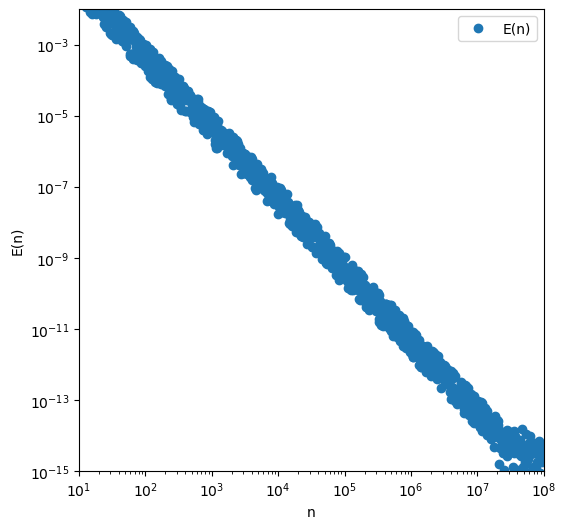

In [20]:
fig = plt.figure(figsize=(6, 6))
ax  = fig.add_subplot()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10, 10**8])
ax.set_ylim([10**-15, 10**-2])
ax.set_xlabel('n')
ax.set_ylabel('E(n)')

ax.plot(invoeren, uitvoeren, 'o', label="E(n)")

ax.legend()

plt.show()